A case study using iris dataset for KNN algorithm

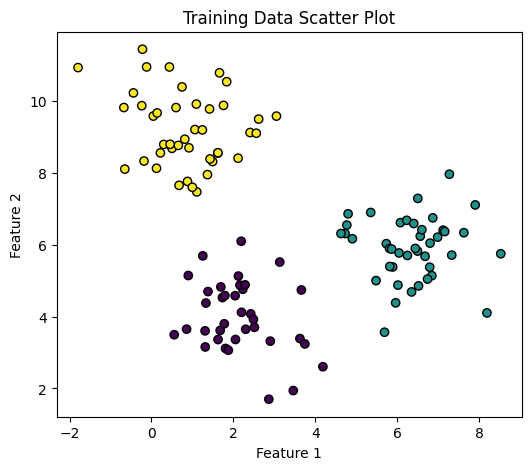

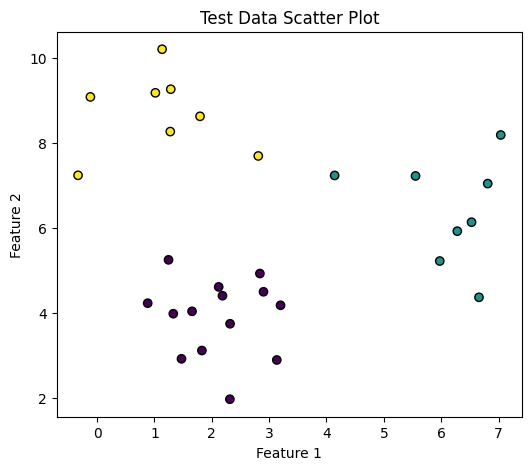

 WITH DEFAULT KNN CLASSIFIER
Training Accuracy: 1.0
Test Accuracy: 1.0

Predictions (Training Data):
[0 2 1 0 0 1 1 2 2 0 2 2 2 1 1 0 0 2 1 1 0 0 0 1 1 2 0 0 1 0 1 1 1 0 1 2 0
 1 0 1 2 2 2 0 2 0 2 2 0 0 0 1 2 2 2 2 1 1 0 1 2 1 2 2 2 0 0 0 0 0 0 0 1 1
 2 1 2 1 2 2 1 1 1 0 2 1 2 1 0 1 2 1 0 2 0 1 2 2 0 2 1 0 0 2 1 1 2 2 0 1 1
 1 2 2 2 1 1 2 1 2]
Target Values (Training Data):
[0 2 1 0 0 1 1 2 2 0 2 2 2 1 1 0 0 2 1 1 0 0 0 1 1 2 0 0 1 0 1 1 1 0 1 2 0
 1 0 1 2 2 2 0 2 0 2 2 0 0 0 1 2 2 2 2 1 1 0 1 2 1 2 2 2 0 0 0 0 0 0 0 1 1
 2 1 2 1 2 2 1 1 1 0 2 1 2 1 0 1 2 1 0 2 0 1 2 2 0 2 1 0 0 2 1 1 2 2 0 1 1
 1 2 2 2 1 1 2 1 2]
Accuracy (Training Data): 1.0

Predictions (Test Data):
[2 1 2 0 0 0 2 2 0 0 0 0 1 1 0 0 0 1 0 0 2 1 0 2 1 2 1 0 1 2]
Target Values (Test Data):
[2 1 2 0 0 0 2 2 0 0 0 0 1 1 0 0 0 1 0 0 2 1 0 2 1 2 1 0 1 2]
Accuracy (Test Data): 1.0
WITH SPECIFIC KNN CLASSIFIER
Training Accuracy: 1.0
Test Accuracy: 1.0

Predictions (Training Data):
[0 2 1 0 0 1 1 2 2 0 2 2 2 1 1 0 0 2 1 1 0 0

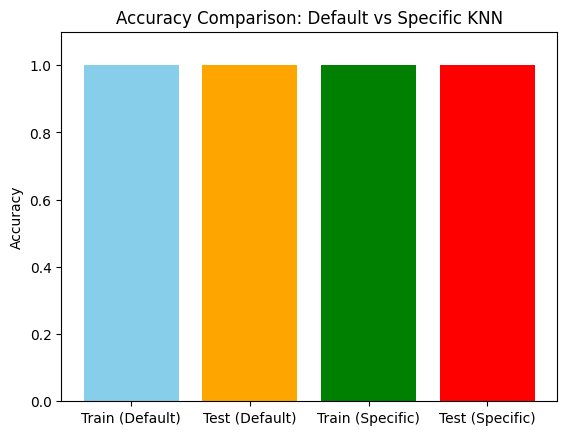

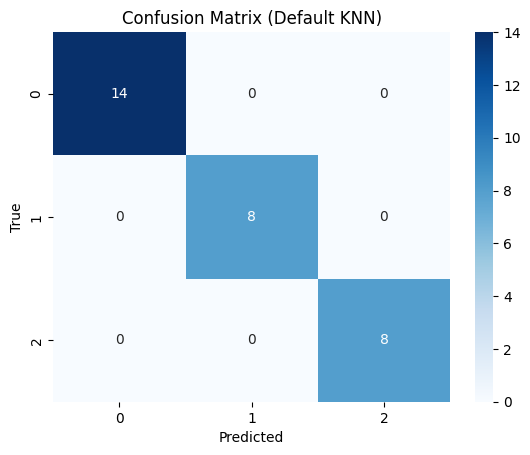

In [12]:

# Importing Necessary Libraries
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Creating an artificial dataset with 3 classes
centers = [[2, 4], [6, 6], [1, 9]]   # cluster centers
n_classes = len(centers)

# Generating synthetic dataset with 150 samples and 3 centers
Data, Labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

# Step 2: Splitting the data into Train & Test
Train_data, Test_data, Train_labels, Test_labels = train_test_split(
    Data, Labels,
    train_size=0.8, # 80% training data
    test_size=0.2,  # 20% testing data
    random_state=12 # For reproducibility
)

# Step 3: Visualizing Training & Test Data

plt.figure(figsize=(6, 5))
plt.scatter(Train_data[:, 0], Train_data[:, 1], c=Train_labels, cmap='viridis', edgecolor='k')
plt.title("Training Data Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(Test_data[:, 0], Test_data[:, 1], c=Test_labels, cmap='viridis', edgecolor='k', marker='o')
plt.title("Test Data Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Step 4: KNN WITH DEFAULT PARAMETERS
knn_default = KNeighborsClassifier()
knn_default.fit(Train_data, Train_labels)

# Predictions
Train_pred_default = knn_default.predict(Train_data)
Test_pred_default = knn_default.predict(Test_data)

# Accuracy
Train_acc_default = accuracy_score(Train_labels, Train_pred_default)
Test_acc_default = accuracy_score(Test_labels, Test_pred_default)

print(" WITH DEFAULT KNN CLASSIFIER")
print("Training Accuracy:", Train_acc_default)
print("Test Accuracy:", Test_acc_default)

# Print Predictions vs Target (Train)
print("\nPredictions (Training Data):")
print(Train_pred_default)
print("Target Values (Training Data):")
print(Train_labels)
print("Accuracy (Training Data):", Train_acc_default)

# Print Predictions vs Target (Test)
print("\nPredictions (Test Data):")
print(Test_pred_default)
print("Target Values (Test Data):")
print(Test_labels)
print("Accuracy (Test Data):", Test_acc_default)

# Step 5: KNN WITH SPECIFIC PARAMETERS

knn_specific = KNeighborsClassifier(
    n_neighbors=7,       # Number of neighbors to consider
    metric='minkowski',  # distance metric
    p=2,                 # Euclidean distance
    weights='uniform'    # All neighbors have equal weight
)

knn_specific.fit(Train_data, Train_labels)

# Predictions
Train_pred_specific = knn_specific.predict(Train_data)
Test_pred_specific = knn_specific.predict(Test_data)

# Accuracy
Train_acc_specific = accuracy_score(Train_labels, Train_pred_specific)
Test_acc_specific = accuracy_score(Test_labels, Test_pred_specific)

print("WITH SPECIFIC KNN CLASSIFIER")
print("Training Accuracy:", Train_acc_specific)
print("Test Accuracy:", Test_acc_specific)

# Print Predictions vs Target (Train)
print("\nPredictions (Training Data):")
print(Train_pred_specific)
print("Target Values (Training Data):")
print(Train_labels)
print("Accuracy (Training Data):", Train_acc_specific)

# Print Predictions vs Target (Test)
print("\nPredictions (Test Data):")
print(Test_pred_specific)
print("Target Values (Test Data):")
print(Test_labels)
print("Accuracy (Test Data):", Test_acc_specific)

# PLOTTING RESULTS

# Step 6: Accuracy comparison bar chart
accuracies = [Train_acc_default, Test_acc_default,
              Train_acc_specific, Test_acc_specific]
labels = ['Train (Default)', 'Test (Default)',
          'Train (Specific)', 'Test (Specific)']

plt.bar(labels, accuracies, color=['skyblue', 'orange', 'green', 'red'])
plt.title('Accuracy Comparison: Default vs Specific KNN')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)
plt.show()

# Step 7: Confusion matrix for Default KNN (Test Data)
cm = confusion_matrix(Test_labels, Test_pred_default)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.arange(n_classes),
            yticklabels=np.arange(n_classes))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Default KNN)')
plt.show()
